In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv(r"data\amazon_cleand_data\Amazon_Review_clean_with_Helpfull.csv")
df.head()
df.dropna(inplace = True)

In [ ]:
# getting a better understanding of the values in the variable Helpfull_yes and Heplfull total


In [14]:
print(df.Helpfull_Yes.value_counts()[1:10])

Helpfull_Yes
1    38468
2    17479
3     9228
4     5433
5     3643
6     2428
7     1714
8     1231
9      977
Name: count, dtype: int64


In [18]:
print(df.Helpfull_total.value_counts()[1:10])

Helpfull_total
1    37053
2    20318
3    11194
4     7365
5     4809
6     3340
7     2427
8     1728
9     1412
Name: count, dtype: int64


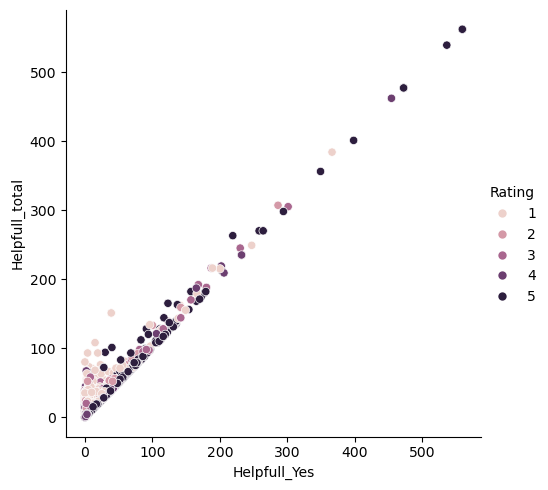

In [26]:
# to get a better understanding of the relation of the two variables they are plotted in a scatterplot 
sns.relplot(x= "Helpfull_Yes", y = "Helpfull_total", hue = "Rating", kind = "scatter", data = df);


In [31]:
# according to the plot it seems, that reviews with low helpfull_yes rating but a comparable high count in helpufllness_total rating seem to have a low product rating
# from theses tow columns a thris columns"Heelpfulness_score" is created. 
df["Helpfull_score"] = df.Helpfull_Yes/df.Helpfull_total
df.head()

,Id,Product_Id,User_Id,Profile_Name,Helpfull_Yes,Helpfull_total,Rating,Time,Review_Header,Review_Text,Helpfull_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN


In [33]:
df = df.fillna(0)

In [34]:
df.head()

,Id,Product_Id,User_Id,Profile_Name,Helpfull_Yes,Helpfull_total,Rating,Time,Review_Header,Review_Text,Helpfull_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0


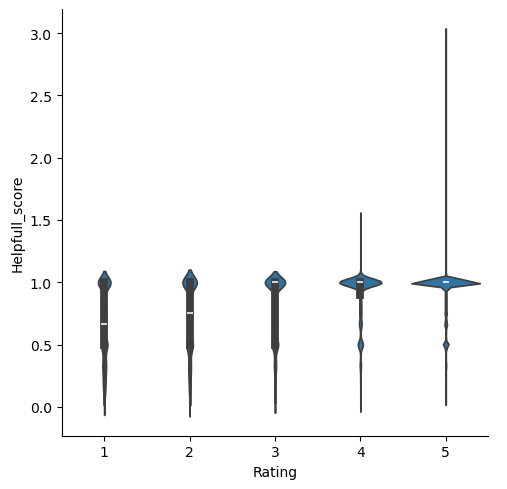

In [39]:
# displaying the ralation of Rating and Helpfull_score
sns.catplot(x = "Rating", y = "Helpfull_score", kind = "violin", data = df.loc[df["Helpfull_score"]!=0]);


In [42]:
# the helpfull_score can have a value between 0 and 1 only as there can not be more Helpfull_yes ratings than there are total Heflfull ratings.
# therfore theses values are selected and delete 
df = df.loc[df["Helpfull_score"]<=1]
df.head()


,Id,Product_Id,User_Id,Profile_Name,Helpfull_Yes,Helpfull_total,Rating,Time,Review_Header,Review_Text,Helpfull_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0


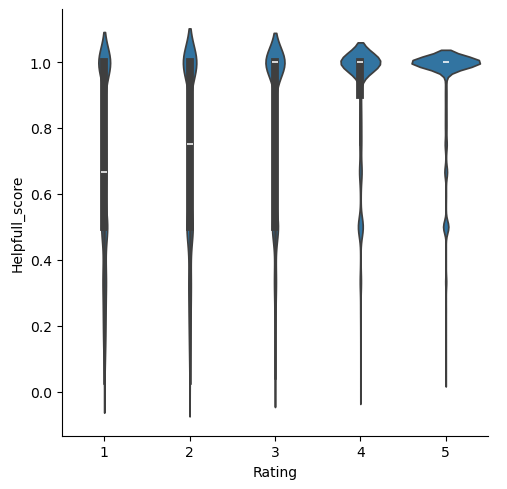

In [45]:
sns.catplot(x = "Rating", y = "Helpfull_score", kind = "violin", data = df.loc[df["Helpfull_score"]!=0]);

In [47]:
# It can be seen that the Median of the "Helpfull_score" is lower for the reviews which a low rating
# Furthermore the piek of the distribution is very steepe and concntratted at the calue 1 for the Products with a high rating,
#  which means, that everybody who rated the Helpfulness of a review found it helpfull.
# The lower the product rating, the lower the product rating, the lore likly the rating is not helpfull 

In [ ]:
# an ANOVA test is performed to veryfy this 
# H0: there is no significant effect of the Helpufll_score on the Rating

In [62]:
from scipy import stats
import statsmodels.api
x= statsmodels.formula.api.ols("Helpfull_score ~ Rating", data = df).fit()
result = statsmodels.api.stats.anova_lm(x)
print(result)

                df        sum_sq    mean_sq           F        PR(>F)
Rating         1.0     31.111092  31.111092  146.661663  9.582614e-34
Residual  184977.0  39238.859654   0.212128         NaN           NaN


In [ ]:
# --> the p-value is 9.58-34, therfore very small, which means, that the H0 Hypothesis can be rejected and it can be assumed, that the variable Helpfull_score has an influence on the rating. 
 

# dependence of the length of the review on the Helpulll_score and the rating

In [68]:
# creating a column with the langth od the review and a column with the length of the review header

df["len_review"] = df["Review_Text"].apply(lambda x: len(x.split()))
df["len_review_header"] = df["Review_Header"].apply(lambda x: len(x.split()))
df.head()

,Id,Product_Id,User_Id,Profile_Name,Helpfull_Yes,Helpfull_total,Rating,Time,Review_Header,Review_Text,Helpfull_score,len_review,len_review:header,len_review_header
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,48,4,4
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,31,3,3
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,94,4,4
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,41,2,2
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,27,2,2


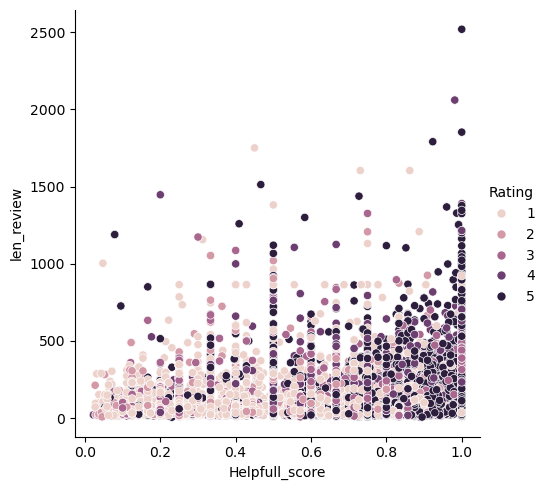

In [71]:
# visualization of dependency
sns.relplot(x= "Helpfull_score", y = "len_review", hue = "Rating", kind = "scatter", data = df.loc[df["Helpfull_score"]!=0]);


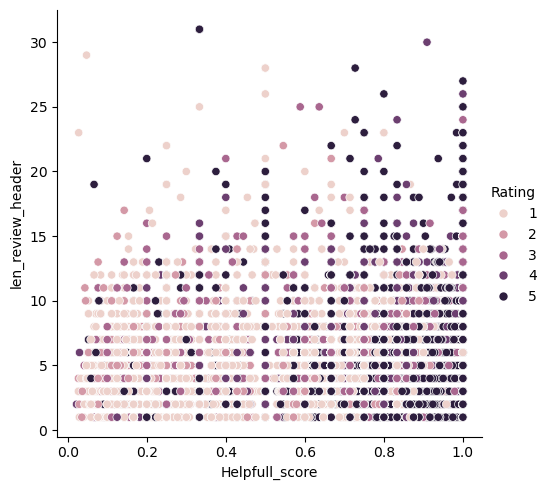

In [72]:
sns.relplot(x= "Helpfull_score", y = "len_review_header", hue = "Rating", kind = "scatter", data = df.loc[df["Helpfull_score"]!=0]);


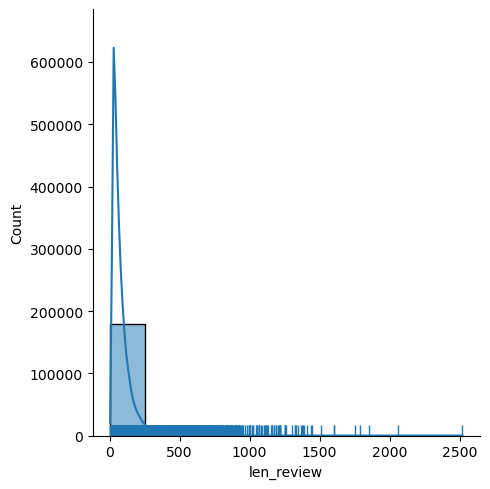

In [78]:

sns.displot(df.len_review, kde = True, rug = True, bins = 10)

In [ ]:
#as bothe variables are not normally distributed, a sperman test is performed
#H0: there is no systematic relationship between the "Helpfull_score" and the "len_review"

In [85]:
#removing the rows without helpfulness rating
df_wh = df.loc[df["Helpfull_score"]!=0]

In [86]:
from scipy.stats import spearmanr
spearmanr(df_wh["Helpfull_score"], df_wh["len_review"])

SignificanceResult(statistic=-0.025475848685030576, pvalue=8.080392210778596e-14)

In [84]:
# the Ho Hypothesis can be rejected as the p-value is < 0.05 --> there is a systematic relationship between the "Helpfull_score" and the "len_review"

,Id,Product_Id,User_Id,Profile_Name,Helpfull_Yes,Helpfull_total,Rating,Time,Review_Header,Review_Text,Helpfull_score,len_review,len_review:header,len_review_header
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,48,4,4
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,31,3,3
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,94,4,4
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,41,2,2
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,27,2,2


In [87]:
#ANOVA: H0: ther is no significant effect of the "len_review" on the "Rating"
x= statsmodels.formula.api.ols("len_review ~ Rating", data = df).fit()
result = statsmodels.api.stats.anova_lm(x)
print(result)

                df        sum_sq       mean_sq            F         PR(>F)
Rating         1.0  8.357016e+06  8.357016e+06  1309.613251  9.281567e-286
Residual  184977.0  1.180391e+09  6.381285e+03          NaN            NaN


In [ ]:
# The Ho hypothesis can be rejected as the p-value is < 0.05.--> ther is a significant effect of the "len_review" on the "Rating"